#### Importing packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### Loading data

In [2]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
feature_name=list(data.columns)
feature_name.remove("Outcome")

#### Removing outliers

In [4]:
from scipy import stats
import numpy as np
def drop_ouliers_z(data,feature_name):
    z = np.abs(stats.zscore(data[feature_name]))
    threshold_z = 2.5
    outlier_indices = np.where(z > threshold_z)[0]
    no_outliers = data.drop(outlier_indices).reset_index(drop=True)
    print("Original DataFrame Shape:", data.shape)
    print("DataFrame Shape after Removing Outliers:", no_outliers.shape)
    return no_outliers
def drop_ouliers_iqr(data,feature_name):
    q1=data[feature_name].quantile(0.25)
    q3=data[feature_name].quantile(0.75)
    iqr=q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    upper_array = np.where(data[feature_name] >= upper)[0]
    lower_array = np.where(data[feature_name] <= lower)[0]
    data=data.drop(upper_array).reset_index(drop=True)
    data=data.drop(lower_array).reset_index(drop=True)
    return data



In [5]:
for feat in feature_name:
    data=drop_ouliers_iqr(data,feat)

#### Splitting data for train and test

In [7]:
x=data[feature_name]
y=data['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

#### Model 1: Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
clf1=LogisticRegression(max_iter=1000)
clf1.fit(x_train,y_train)
preds=clf1.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,preds)*100)

Accuracy score: 79.03225806451613


#### Model 2: Gaussian Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB
clf2=GaussianNB()
clf2.fit(x_train,y_train)
preds=clf2.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,preds)*100)

Accuracy score: 77.41935483870968


#### Model 3: K Nearest Neighbors

In [10]:
from sklearn.neighbors import KNeighborsClassifier
clf3=KNeighborsClassifier(n_neighbors=17)
clf3.fit(x_train,y_train)
preds=clf3.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,preds)*100)

Accuracy score: 77.41935483870968


#### Model 4: Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf4=DecisionTreeClassifier(criterion='log_loss',)
clf4.fit(x_train,y_train)
preds=clf4.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,preds)*100)

Accuracy score: 74.19354838709677


#### Model 5: XGBoost Classifier

In [12]:
import xgboost as xgb
clf5 = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
clf5.fit(x_train,y_train)
preds=clf5.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,preds)*100)

Accuracy score: 78.2258064516129


#### Model 6: Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf6=RandomForestClassifier(n_estimators=1000)
clf6.fit(x_train,y_train)
preds=clf6.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,preds)*100)

Accuracy score: 81.45161290322581


#### Model 7: Support Vector Classifier

In [14]:
from sklearn.svm import SVC
clf7=SVC()
clf7.fit(x_train,y_train)
preds=clf7.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,preds)*100)

Accuracy score: 79.83870967741935


#### Conclusion:

##### The best performing model for this dataset is Random Forest Classifier with accuracy 81.45161290322581

#### Interpreting and storing best model results

##### 1. Confusion matrix for Random Forest Classifier

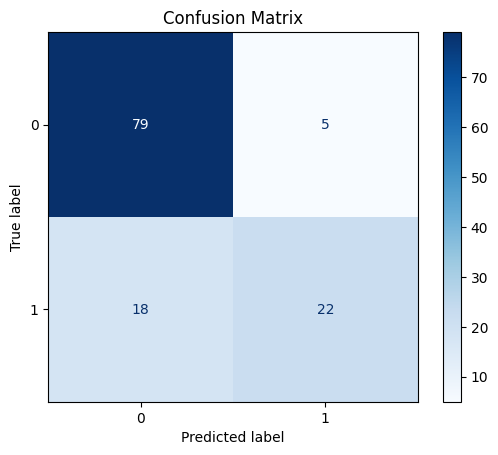

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
preds=clf6.predict(x_test)
cm = confusion_matrix(y_test, preds)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

##### 2. Storing the best model

In [16]:
import pickle 
pickle.dump(clf6, open("best_model.pkl", 'wb'))

##### 3. Lime Interpretations:

In [17]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=feature_name,
    class_names=[0,1],
    mode='classification'
)

In [18]:
exp= explainer.explain_instance(
    data_row=x_test.iloc[53], 
    predict_fn=clf6.predict_proba
)

exp.show_in_notebook(show_table=True)

c:\Users\vjana\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


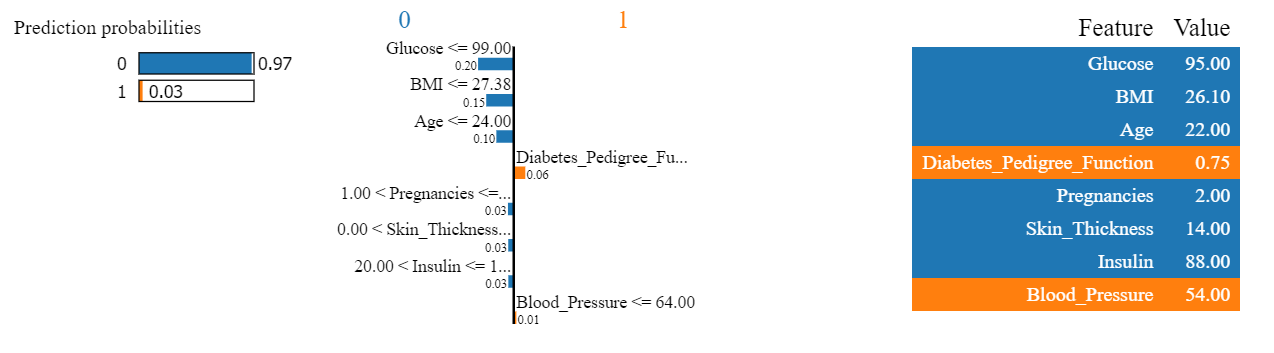

In [19]:
exp= explainer.explain_instance(
    data_row=x_test.iloc[88], 
    predict_fn=clf6.predict_proba
)

exp.show_in_notebook(show_table=True)

c:\Users\vjana\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


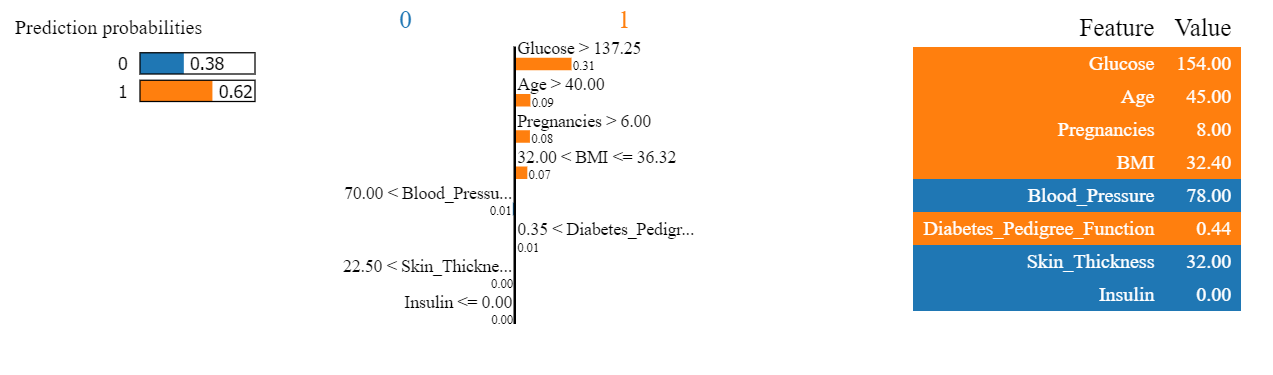

##### 4.SHAP interpretations

Using 620 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/620 [00:00<?, ?it/s]

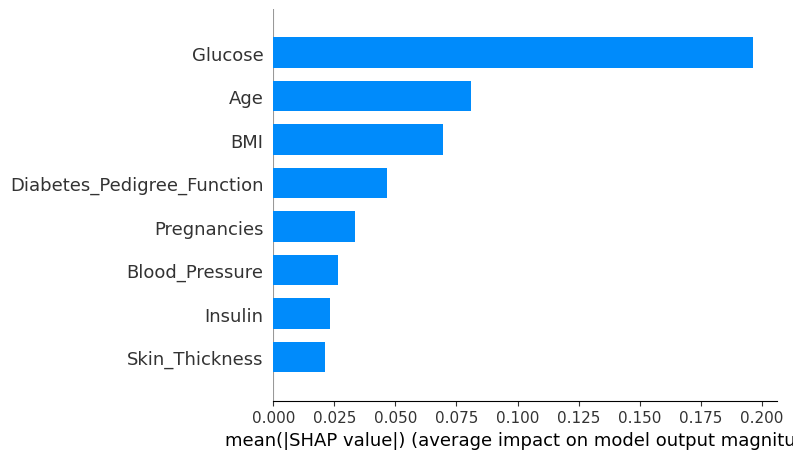

In [20]:
import shap
explainer = shap.KernelExplainer(clf6.predict, x)
shap_values = explainer.shap_values(x)
shap.summary_plot(shap_values, x_train, plot_type="bar")